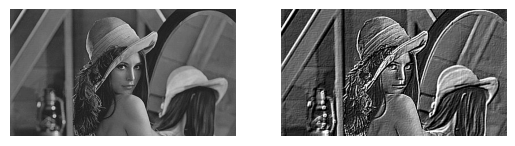

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Task 1:
img = cv2.imread('../Practice-Images/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2Gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def embossFilter(img):
    _img = img.copy()

    kernelEmboss = np.array\
    ([[-2,-1,0],
      [-1,1,1],
      [0,1,2]])

    _img = cv2.filter2D(img, -1, kernelEmboss)
    return _img

img_embossed = embossFilter(cv2Gray)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2Gray, cmap='gray')
axarr[1].imshow(img_embossed, cmap='gray')

axarr[0].axis('off')
axarr[1].axis('off')

plt.imshow(img_embossed, cmap='gray')
plt.show()

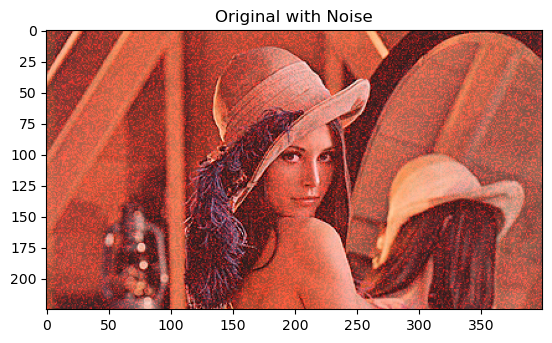

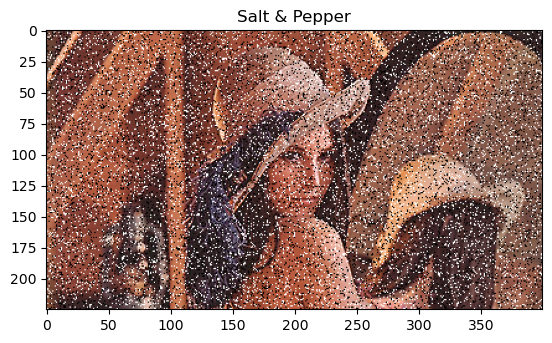

In [3]:
# Task 2:
noise = np.zeros(img.shape, np.uint8)
mean = 30
sigma = 60
cv2.randn(noise, mean, sigma)

def add_salt_pepper(img, SNR):
    _img = img.copy()
    c, h, w = _img.shape
    mask = np.random.choice((0,1,2), size=(1,h,w), p=[SNR, (1-SNR)/2., (1-SNR)/2.])
    mask = np.repeat(mask, c, axis=0)

    _img[mask == 1] = 255 #salt
    _img[mask == 2] = 0 #pepper

    return _img

img_noise = cv2.add(img,noise)
plt.imshow(img_noise), plt.title('Original with Noise')
plt.show()


image_salt_pepper = add_salt_pepper(img.transpose(2,1,0), 0.8)
image_salt_pepper = image_salt_pepper.transpose(2,1,0)
plt.imshow(image_salt_pepper), plt.title('Salt & Pepper')
plt.show()

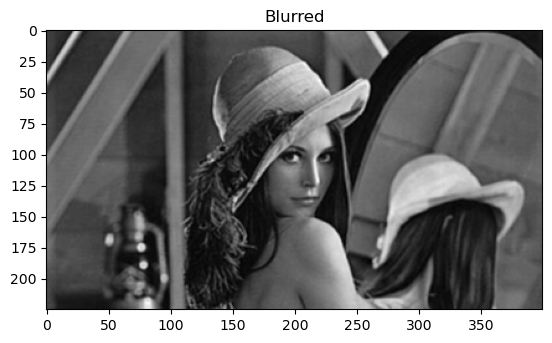

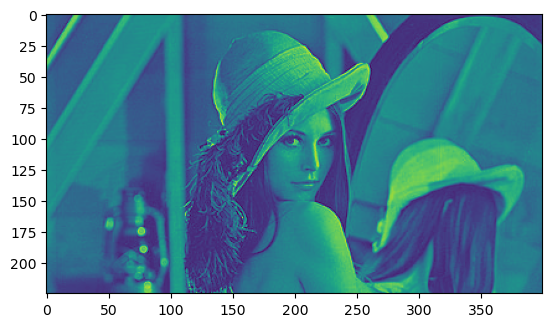

In [11]:
# Task 3:
kernel = np.array\
    ([[1,2,1],
      [2,4,2],
      [1,2,1]])

kernel = kernel * 1/16

blurred3x3 = cv2.filter2D(cv2Gray, -1, kernel)

plt.imshow(blurred3x3, cmap='gray'), plt.title("Blurred")
plt.show()

plt.imshow(img)
plt.show()